In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Water-Potability

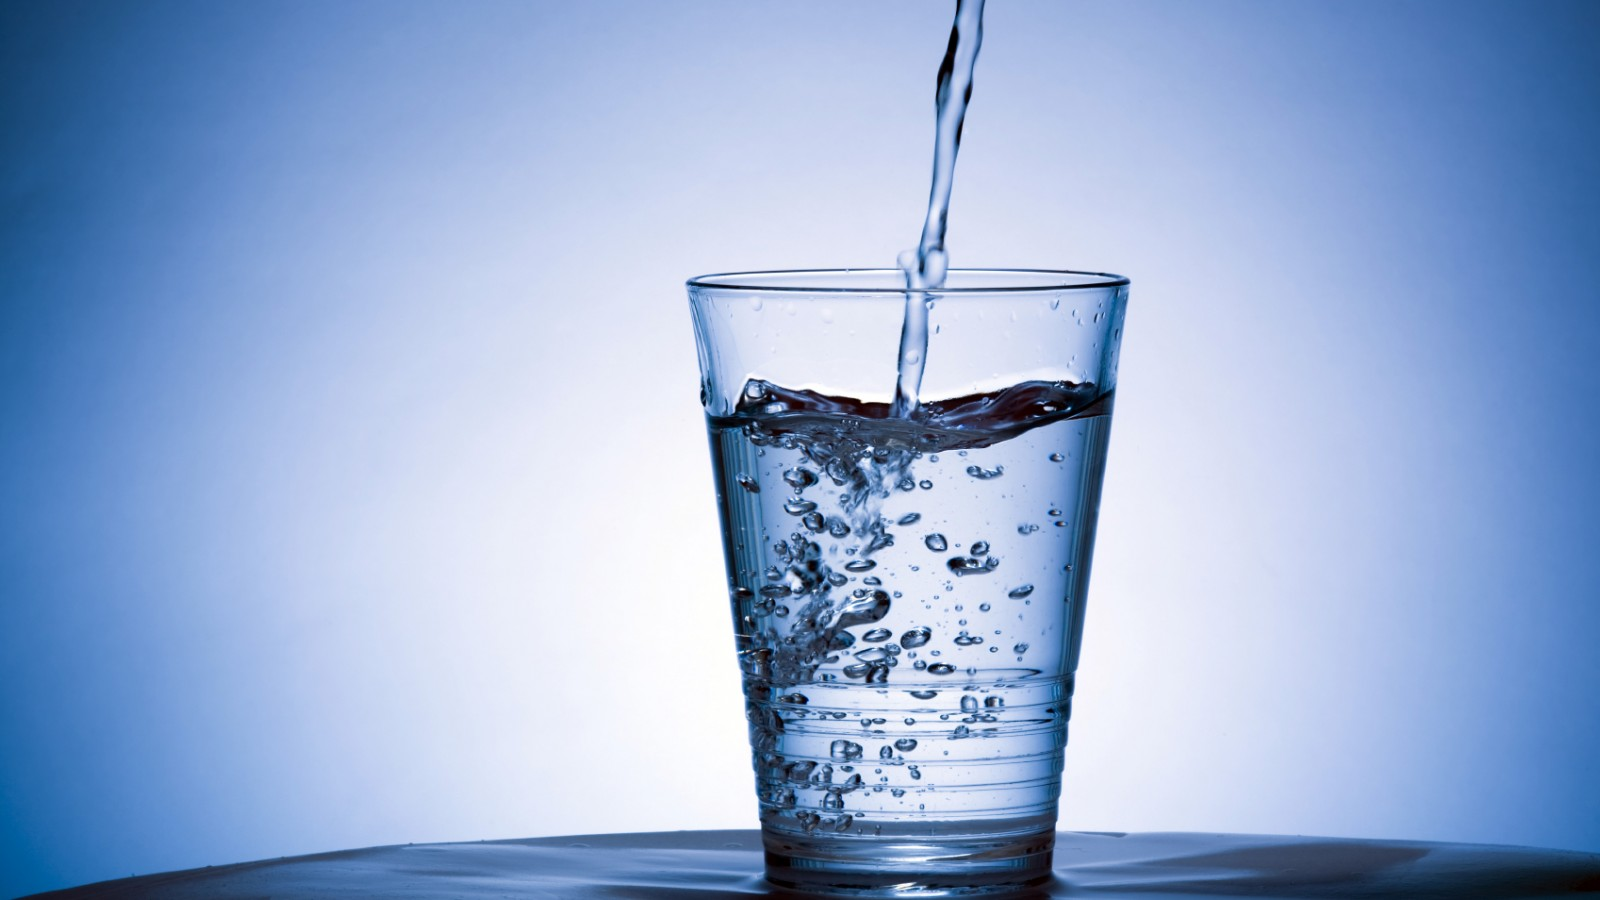

Believe it or not, your body weight is about **60 percent water**, according to the U.S. Geological Survey. Your body uses **water** in all its cells, organs, and tissues to help regulate temperature and maintain other bodily functions. Because your body loses water through breathing, sweating, and digestion. 

# Problem Definition: 
To predict whether the water is potable(Drinkable) based on the below given available features in the data,

1. **pH value:**
PH is an important parameter in evaluating the acid–base balance of water. It is also the indicator of acidic or alkaline condition of water status. WHO has recommended maximum permissible limit of pH from 6.5 to 8.5. The current investigation ranges were 6.52–6.83 which are in the range of WHO standards.

2. **Hardness:**
Hardness is mainly caused by calcium and magnesium salts. These salts are dissolved from geologic deposits through which water travels. The length of time water is in contact with hardness producing material helps determine how much hardness there is in raw water. Hardness was originally defined as the capacity of water to precipitate soap caused by Calcium and Magnesium.

3. **Solids (Total dissolved solids - TDS):**
Water has the ability to dissolve a wide range of inorganic and some organic minerals or salts such as potassium, calcium, sodium, bicarbonates, chlorides, magnesium, sulfates etc. These minerals produced un-wanted taste and diluted color in appearance of water. This is the important parameter for the use of water. The water with high TDS value indicates that water is highly mineralized. Desirable limit for TDS is 500 mg/l and maximum limit is 1000 mg/l which prescribed for drinking purpose.

4. **Chloramines:**
Chlorine and chloramine are the major disinfectants used in public water systems. Chloramines are most commonly formed when ammonia is added to chlorine to treat drinking water. Chlorine levels up to 4 milligrams per liter (mg/L or 4 parts per million (ppm)) are considered safe in drinking water.

5. **Sulfate:**
Sulfates are naturally occurring substances that are found in minerals, soil, and rocks. They are present in ambient air, groundwater, plants, and food. The principal commercial use of sulfate is in the chemical industry. Sulfate concentration in seawater is about 2,700 milligrams per liter (mg/L). It ranges from 3 to 30 mg/L in most freshwater supplies, although much higher concentrations (1000 mg/L) are found in some geographic locations.

6. **Conductivity:**
Pure water is not a good conductor of electric current rather’s a good insulator. Increase in ions concentration enhances the electrical conductivity of water. Generally, the amount of dissolved solids in water determines the electrical conductivity. Electrical conductivity (EC) actually measures the ionic process of a solution that enables it to transmit current. According to WHO standards, EC value should not exceeded 400 μS/cm.

7. **Organic_carbon:**
Total Organic Carbon (TOC) in source waters comes from decaying natural organic matter (NOM) as well as synthetic sources. TOC is a measure of the total amount of carbon in organic compounds in pure water. According to US EPA < 2 mg/L as TOC in treated / drinking water, and < 4 mg/Lit in source water which is use for treatment.

8. **Trihalomethanes:**
THMs are chemicals which may be found in water treated with chlorine. The concentration of THMs in drinking water varies according to the level of organic material in the water, the amount of chlorine required to treat the water, and the temperature of the water that is being treated. THM levels up to 80 ppm is considered safe in drinking water.

9. **Turbidity:**
The turbidity of water depends on the quantity of solid matter present in the suspended state. It is a measure of light emitting properties of water and the test is used to indicate the quality of waste discharge with respect to colloidal matter. The mean turbidity value obtained for Wondo Genet Campus (0.98 NTU) is lower than the WHO recommended value of 5.00 NTU.

10. **Potability:**
Indicates if water is safe for human consumption where 1 means Potable and 0 means Not potable.


We have to predict the water potability based on the first nine above seen  features




# Importing Data and EDA 

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns 

In [ ]:
df = pd.read_csv("../input/water-potability/water_potability.csv")

In [ ]:
df.head()

In [ ]:
df.info()

In [ ]:
df.describe()

In [ ]:
df.Potability.value_counts()*100/len(df)

In [ ]:
# Visualizing Class imbalance in the target variable
sns.countplot(x='Potability', data=df);


In [ ]:
df.isnull().sum()

In [ ]:
# Checking for the percentange of the missing values in the data 
df.isnull().sum()*100/len(df)

In [ ]:
# splitting the data as X(independent variables) and Y(dependent variable)
x = df.drop('Potability', axis=1)
y= df.Potability.values

In [ ]:
fig, ax= plt.subplots(figsize=(15,10))
sns.heatmap(x.corr(), ax=ax, annot=True, linewidths=0.5, fmt=".2f", cmap="YlGnBu")
plt.show()

As we can see there are no features strongly correlated with others. So we need not think about Dimensionality reduction...

# Filling Missing Values

So, now we should take care of the missing values, I think imputing the missing values with mean or median will be a better way to go about, for doing that, I'm first splitting the data, so i can impute the train and test data both seperately, because it will cause bias in the model if we impute without splitting the data...

In [ ]:
from sklearn.model_selection import train_test_split
np.random.seed(42)

x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2)
x_train.shape, y_train.shape, 

In [ ]:
x_test.shape, y_test.shape

In [ ]:
import warnings
warnings.filterwarnings("ignore")

x_train.fillna(x_train.mean(), inplace=True)
x_test.fillna(x_test.mean(), inplace=True)

In [ ]:
x_train.isnull().sum()

# Modelling

Model Choices, 

We are going to experiment this data with four models,


*   Logistic Regression
*   K-nearest neighbors
*   Random Forest Classifier
*   Gradient Boosting 



In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [ ]:
models = {"Logistic Regression": LogisticRegression(solver='liblinear'),
          "KNN": KNeighborsClassifier(),
          "Random forest": RandomForestClassifier(),
          "Gradient Boosting": GradientBoostingClassifier()}

def fit_and_score(x_train, y_train, x_test, y_test):
  
  np.random.seed(42)
  
  model_scores = {}

  for name, model in models.items():
    model.fit(x_train, y_train)

    model_scores[name] = model.score(x_test, y_test)

  return model_scores


In [ ]:
model_scores = fit_and_score(x_train, y_train, x_test, y_test)
model_scores

In [ ]:
model_compare = pd.DataFrame(model_scores, index= ['Accuracy'])
fig, ax = plt.subplots(figsize=(8,6))
model_compare.plot.barh(ax=ax)
plt.title('Score comparison between the models')
plt.xticks(rotation=0);

As we can see, our random forest classifier does a better overall job as compared to others. So we are going to tune the hyper parameters for Random Forest Classifier.

# Hyper parameter tuning
Here, I'm going to use RandomizedSearchCV and GridSearchCV to find the best hyper parameters for the best permformed model.

In [ ]:
rf_grid = {"n_estimators": np.arange(10,1000,50),
           "max_depth": [None, 3, 5, 7, 10],
           "min_samples_split": np.arange(2,20,2),
           "min_samples_leaf": np.arange(1, 25, 1)}
           

In [ ]:
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions = rf_grid,
                           cv=5,
                           n_iter = 20,
                           verbose=True
                           )
rs_rf.fit(x_train, y_train)

In [ ]:
rs_rf.best_params_

In [ ]:
# With the best params, got from RandomizedSearchCV, proceeding on GridsearchCV.
rs_rf_grid = {"max_depth": [None],
              "min_samples_leaf": [5,6,7],
              "min_samples_split": [15,16,17],
              "n_estimators": [960]}
gs_rf = GridSearchCV(RandomForestClassifier(),
                     param_grid = rs_rf_grid,
                     cv= 5, 
                     verbose=True)

gs_rf.fit(x_train, y_train)

In [ ]:
gs_rf.best_params_

In [ ]:
gs_rf.score(x_test, y_test)

# Evaluating our Model 

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

In [ ]:
y_preds = gs_rf.predict(x_test)

**ROC and AUC Scores**

In [ ]:
plot_roc_curve(gs_rf, x_test, y_test);

**Confusion Matrix**

In [ ]:
fig,ax = plt.subplots(figsize=(4,4))
ax= sns.heatmap(confusion_matrix(y_test, y_preds),
                annot = True,
                cbar= False,
                fmt='g')
plt.xlabel('True Label')
plt.ylabel('Predicted Label')
plt.title('Confusion-Matrix')
plt.show()


As we can, see the model gets confused(predicts wrong label) relatively same amount across both the classes with respect to the class imbalance.




**Classification Report**

In [ ]:
print(classification_report(y_test, y_preds))

So, Finally I complete this notebook here, Comment your feedbacks and Kindly upvote if you liked the kernel :)